In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", color_codes=True, font_scale=1)
# sns.set_style('white')
sns.set_palette('deep')

In [32]:
import zipfile

In [33]:
with zipfile.ZipFile('KMeans-Quiz.zip','r') as zip_ref:
    zip_ref.extractall('KMeans-Quiz')

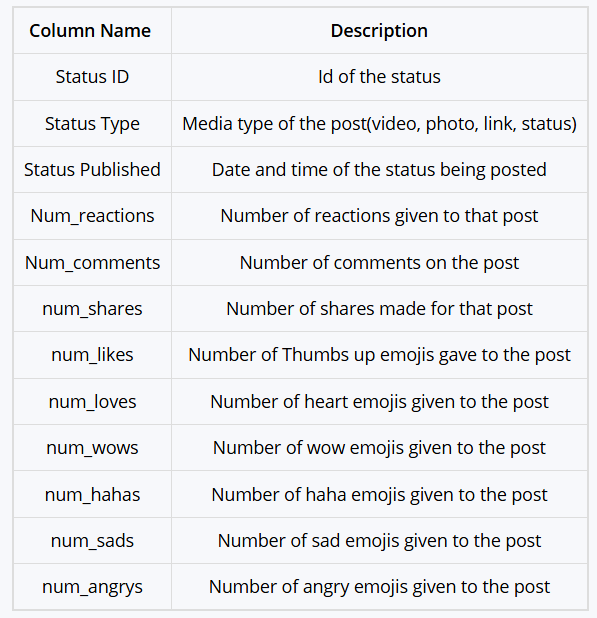

### **Problem Explanation**

The given problem is about analyzing a dataset of Facebook Live Sellers in Thailand. It includes details of Facebook posts (status updates) made by sellers, along with their engagement metrics. These engagement metrics include reactions, comments, shares, and different types of emojis (like, love, wow, etc.). The dataset also classifies each post by its **status type** (video, photo, link, or status).

#### **Key Objective:**

* **Cluster the Facebook posts (status updates) based on engagement behaviors.**
   - Engagement behaviors include attributes such as the number of reactions, comments, shares, and emoji reactions (like, love, wow, etc.).
   - The idea is to group posts that exhibit similar patterns in engagement metrics, irrespective of their **status type**.


**`The ultimate goal is to understand how posts of different status types (video, photo, link, or status) perform in terms of engagement.   This can help businesses tailor their content strategies for better results `**

In [34]:
df=pd.read_csv('KMeans Quiz/Live.csv')
df.head(1)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN


In [35]:
df.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3',
       'Column4'],
      dtype='object')

In [36]:
df.drop(columns=['Column1', 'Column2', 'Column3','Column4'],inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


In [38]:
df.isnull().sum()

status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64

In [39]:
df.duplicated().sum()

51

In [40]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [41]:
df.head(1)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0


In [42]:
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [43]:
df[df['status_published']=='7/15/2017 10:52']

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
6977,1050855161656896_1339706342771775,video,7/15/2017 10:52,253,4432,167,209,29,5,5,5,0


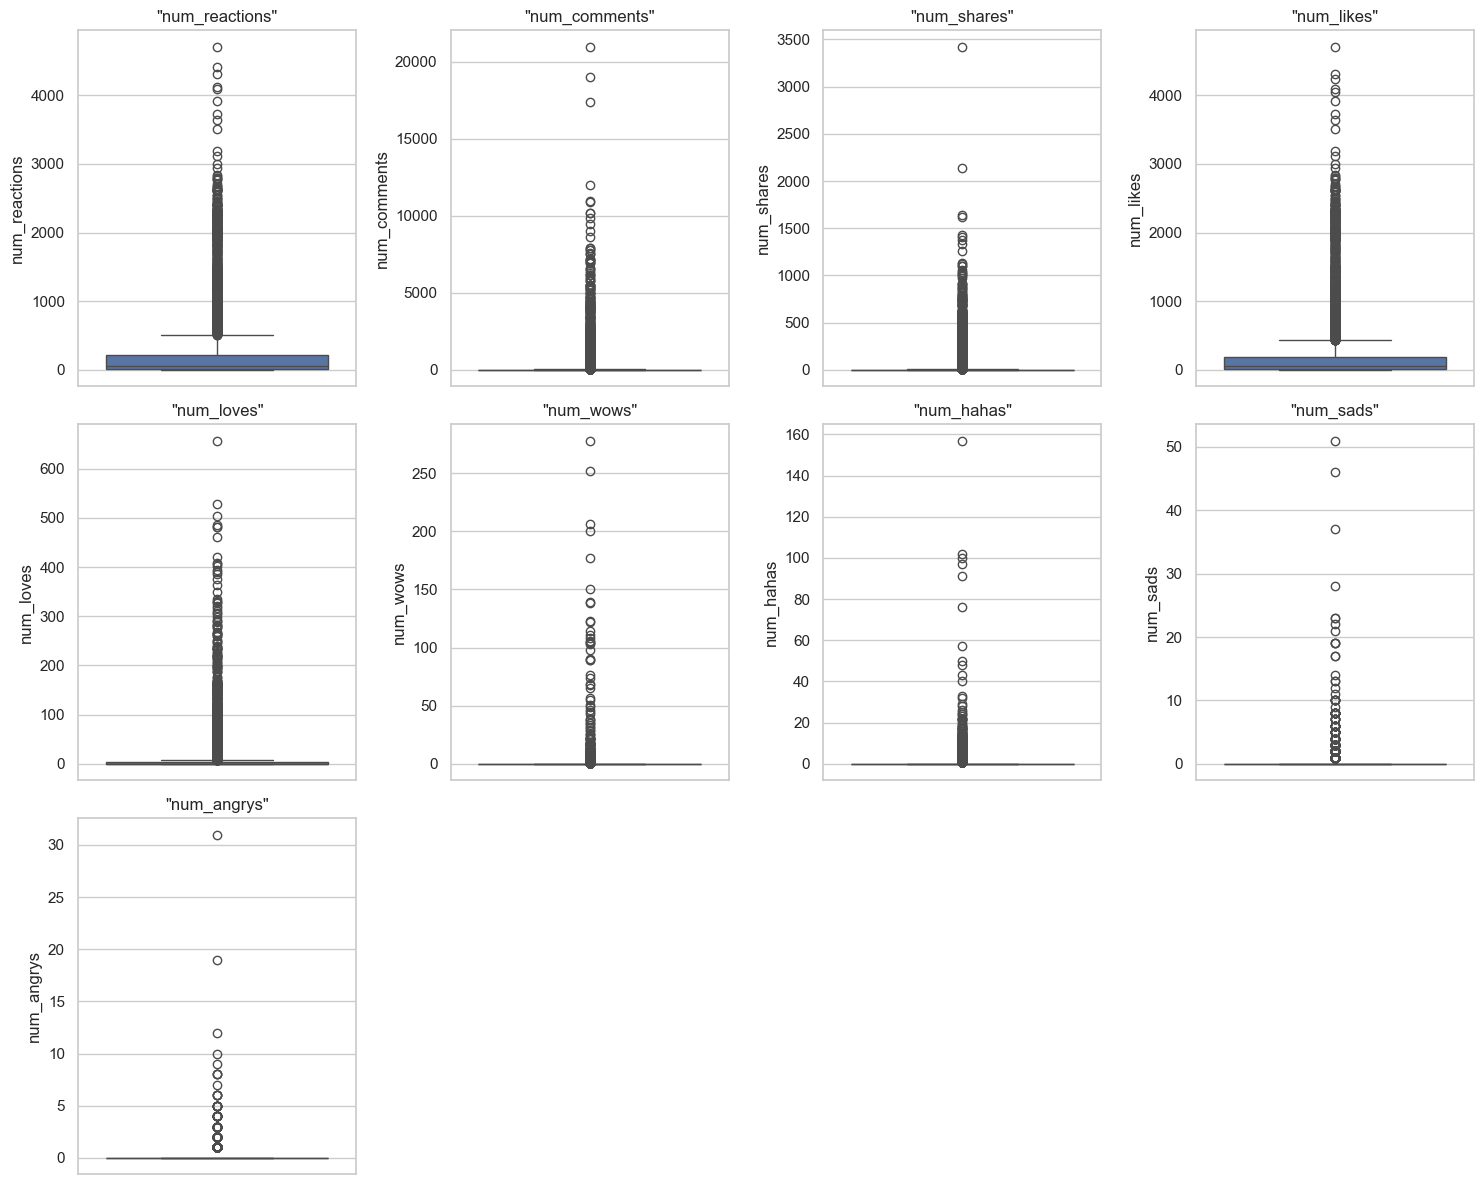

In [44]:
#check for outleirs

numeric_cols=df.select_dtypes(include='number').columns

num_cols=len(numeric_cols)
ncols=4

nrows=(num_cols+ncols-1)//ncols

fig,axes=plt.subplots(nrows=nrows,ncols=ncols,figsize=(5*nrows,3*ncols))
axes=axes.flatten()


for ax,col in zip(axes,numeric_cols):
    sns.boxplot(df[col],ax=ax)
    ax.set_title(f'"{col}"')

for i in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6999 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         6999 non-null   object
 1   status_type       6999 non-null   object
 2   status_published  6999 non-null   object
 3   num_reactions     6999 non-null   int64 
 4   num_comments      6999 non-null   int64 
 5   num_shares        6999 non-null   int64 
 6   num_likes         6999 non-null   int64 
 7   num_loves         6999 non-null   int64 
 8   num_wows          6999 non-null   int64 
 9   num_hahas         6999 non-null   int64 
 10  num_sads          6999 non-null   int64 
 11  num_angrys        6999 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 710.8+ KB


In [46]:
#droping status_published  as it is not necessary here in this analyis

df.drop(columns=['status_id', 'status_published'],inplace=True)

#### Encode categorical columns and scale numeric columns

In [47]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

numeric_cols=['num_reactions', 'num_comments',
       'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas',
       'num_sads', 'num_angrys']
categorical_cols=['status_type']


In [48]:
encoder = LabelEncoder()
sc=StandardScaler()
df[categorical_cols]=df[categorical_cols].apply(lambda col : encoder.fit_transform(col))
df[numeric_cols]=sc.fit_transform(df[numeric_cols])

In [49]:
numeric_cols

['num_reactions',
 'num_comments',
 'num_shares',
 'num_likes',
 'num_loves',
 'num_wows',
 'num_hahas',
 'num_sads',
 'num_angrys']

In [50]:
df

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,0.671318,0.320886,1.679382,0.505219,1.976073,0.200243,0.076069,0.518160,-0.15999
1,1,-0.165606,-0.252669,-0.304903,-0.136392,-0.317962,-0.143599,-0.175780,-0.157059,-0.15999
2,3,0.004428,0.011704,0.126793,-0.013530,0.205677,-0.028985,0.076069,-0.157059,-0.15999
3,1,-0.251728,-0.252669,-0.304903,-0.225125,-0.317962,-0.143599,-0.175780,-0.157059,-0.15999
4,1,-0.026487,-0.252669,-0.304903,-0.013530,-0.093545,-0.143599,-0.175780,-0.157059,-0.15999
...,...,...,...,...,...,...,...,...,...,...
7045,1,-0.300309,-0.252669,-0.304903,-0.275180,-0.317962,-0.143599,-0.175780,-0.157059,-0.15999
7046,1,-0.461511,-0.252669,-0.304903,-0.445821,-0.293026,-0.143599,0.076069,-0.157059,-0.15999
7047,1,-0.492427,-0.252669,-0.304903,-0.475399,-0.293026,-0.143599,-0.175780,-0.157059,-0.15999
7048,1,0.278251,-0.239226,-0.138284,0.316376,-0.268091,-0.143599,-0.175780,-0.157059,-0.15999


In [51]:
k_values=[2,3,4,5,6,7]

In [52]:
from sklearn.cluster import KMeans

ssd=[]

for k in k_values:
    km=KMeans(n_clusters=k,max_iter=150,random_state=140)
    km.fit(df)
    ssd.append(km.inertia_)


In [53]:
ssd

[54204.35470624115,
 46531.01933828279,
 37412.44135309933,
 32025.58797253383,
 29304.415500715524,
 26089.525653077115]

Text(0, 0.5, 'WCSS')

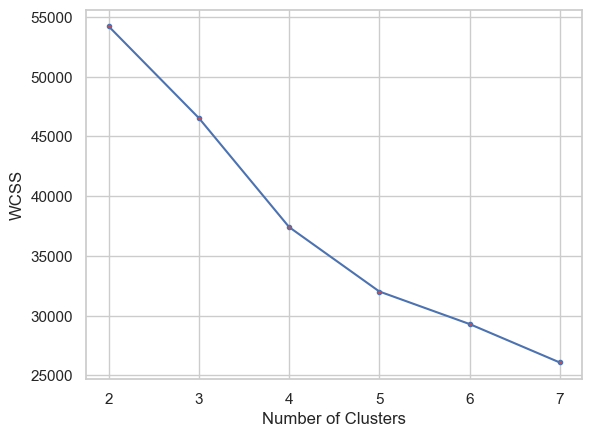

In [54]:
sns.set_style("whitegrid")
plt.plot(k_values,ssd,marker='o',markersize=3,markerfacecolor='r')

plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')


In [55]:
kmodel=KMeans(n_clusters=4,max_iter=150,random_state=25)
kmodel.fit(df)

KMeans(max_iter=150, n_clusters=4, random_state=25)

In [56]:
kmodel.labels_

array([3, 0, 3, ..., 0, 0, 0])

In [57]:
from sklearn.metrics import pairwise_distances
# Get cluster centroids
centroids = kmodel.cluster_centers_

# Calculate pairwise distances between centroids
distances = pairwise_distances(centroids)

# Calculate inter-cluster variance
inter_cluster_variance = np.var(distances)
print(f'Inter-Cluster Variance: {inter_cluster_variance}')


Inter-Cluster Variance: 13.791627245668678


In [58]:
df['Cluster Id']=kmodel.labels_

In [59]:
kmodel.inertia_

37412.968994783456

In [60]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Cluster Id
0,3,0.671318,0.320886,1.679382,0.505219,1.976073,0.200243,0.076069,0.518160,-0.15999,3
1,1,-0.165606,-0.252669,-0.304903,-0.136392,-0.317962,-0.143599,-0.175780,-0.157059,-0.15999,0
2,3,0.004428,0.011704,0.126793,-0.013530,0.205677,-0.028985,0.076069,-0.157059,-0.15999,3
3,1,-0.251728,-0.252669,-0.304903,-0.225125,-0.317962,-0.143599,-0.175780,-0.157059,-0.15999,0
4,1,-0.026487,-0.252669,-0.304903,-0.013530,-0.093545,-0.143599,-0.175780,-0.157059,-0.15999,0


In [61]:
df['Cluster Id'].value_counts()

Cluster Id
0    4328
3    2107
1     371
2     193
Name: count, dtype: int64

<Axes: xlabel='num_reactions', ylabel='num_shares'>

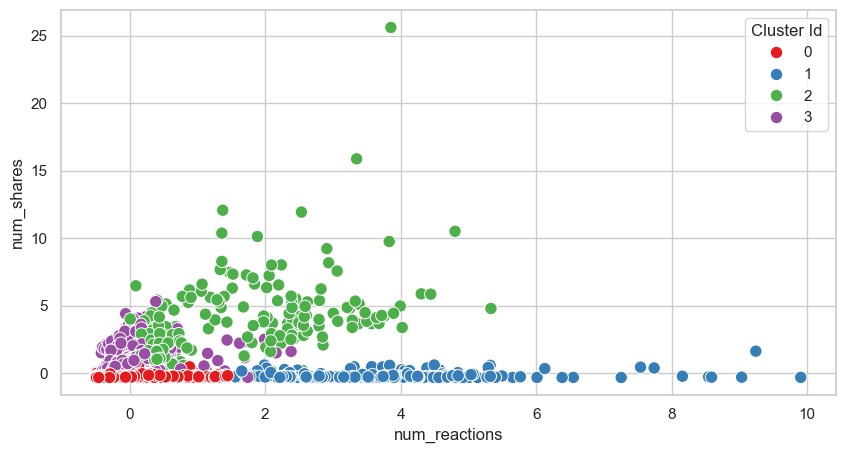

In [62]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x='num_reactions',y='num_shares',hue='Cluster Id',palette='Set1',s=80)

<Axes: xlabel='num_likes', ylabel='num_comments'>

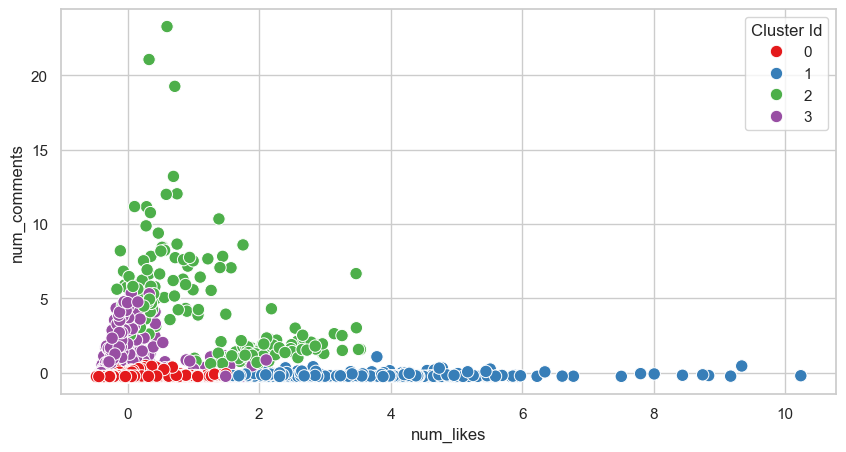

In [63]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x='num_likes',y='num_comments',hue='Cluster Id',palette='Set1',s=80)

In [64]:
from sklearn.metrics import davies_bouldin_score

# Compute the Davies-Bouldin Index
score = davies_bouldin_score(df, kmodel.labels_)
score

1.1108071913461586